In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('stud.csv')

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print(df['gender'].unique())

['female' 'male']


In [14]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [18]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [19]:
print(numeric_feature,'\n',categorical_feature)

['math_score', 'reading_score', 'writing_score'] 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
# feature eng
# add total score and average 
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']= df['total_score']/3

In [21]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [22]:
rf = df[df['reading_score']==100]['reading_score'].count()
mf = df[df['math_score']==100]['math_score'].count()
wf = df[df['writing_score']==100]['writing_score'].count()
print(mf,rf,wf)

7 17 14


In [23]:
hun = df[df['average_score']<=40]['race_ethnicity'].count()
hun

32

In [24]:
mrl20 = df[df['math_score']<=20]['math_score'].count()
rl20 = df[df['reading_score']<=20]['reading_score'].count()
wl20 = df[df['writing_score']<=20]['writing_score'].count()
print(mrl20,rl20,wl20)

4 1 3


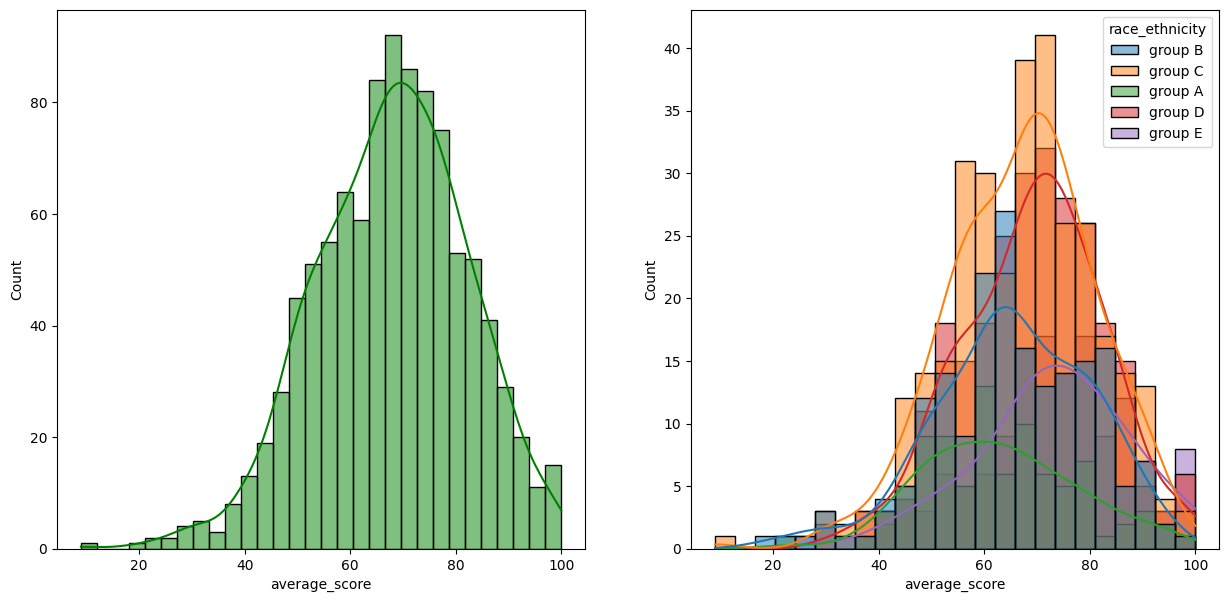

In [25]:
#hist amd KDE
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True, hue='race_ethnicity')
plt.show()

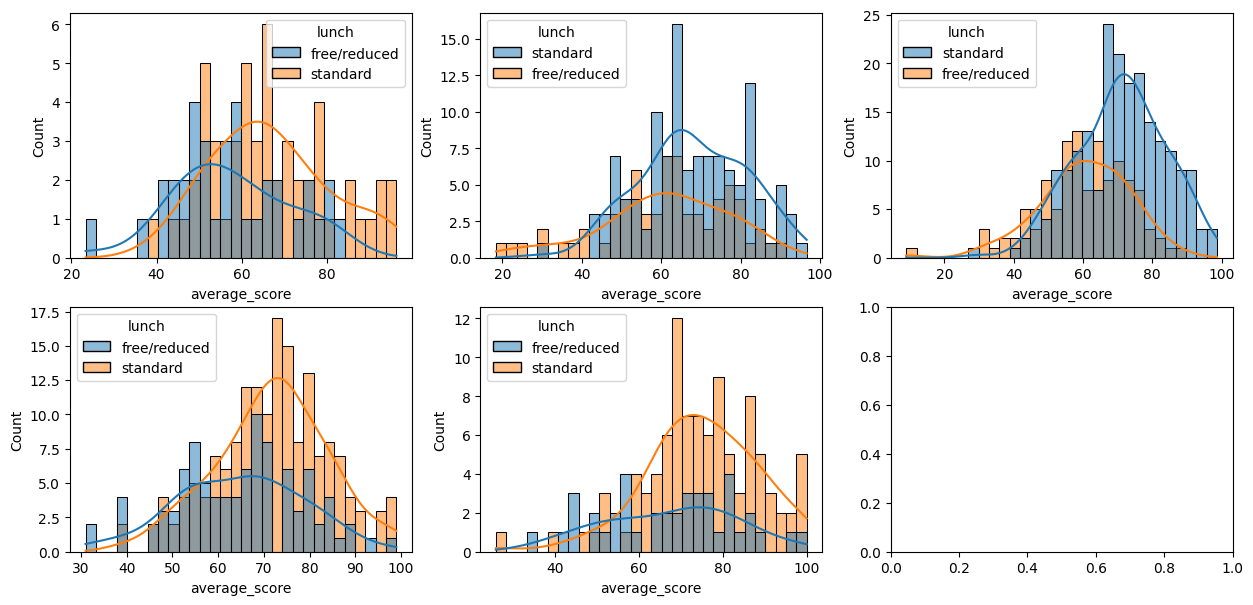

In [26]:
fig, axs = plt.subplots(2,3,figsize=(15,7))
plt.subplot(231)
sns.histplot(data=df[df.race_ethnicity=='group A'],x='average_score',bins=30,kde=True, hue='lunch')
plt.subplot(232)
sns.histplot(data=df[df.race_ethnicity=='group B'],x='average_score',bins=30,kde=True, hue='lunch')
plt.subplot(233)
sns.histplot(data=df[df.race_ethnicity=='group C'],x='average_score',bins=30,kde=True, hue='lunch')
plt.subplot(234)
sns.histplot(data=df[df.race_ethnicity=='group D'],x='average_score',bins=30,kde=True, hue='lunch')
plt.subplot(235)
sns.histplot(data=df[df.race_ethnicity=='group E'],x='average_score',bins=30,kde=True, hue='lunch')

plt.show()


# conclusion 

 - in gorup B male students hase much higher average score than females
 - student who have having standerd lunch has higher score with respect to gender
 - Parents having higher degree leeds to lover average score in child.
 - those who havent completed the test preparation course has gained more score 
 - 